## Predicting Employee's Retention using Logistic Regression

Building a classification model to predict if an employee will choose to leave a company or be retained at it. This prediction will be based on some factors such as their job satifaction levels, evaluation scores, length of service and others.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Reading in the data
hr = pd.read_csv('HR_comma_sep.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Cleaning

In [3]:
# Checking for null values
hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## Exploratory Data Analysis

In [4]:
hr.shape

(14999, 10)

In [5]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Distribution of Numeric columns by Employee Retention

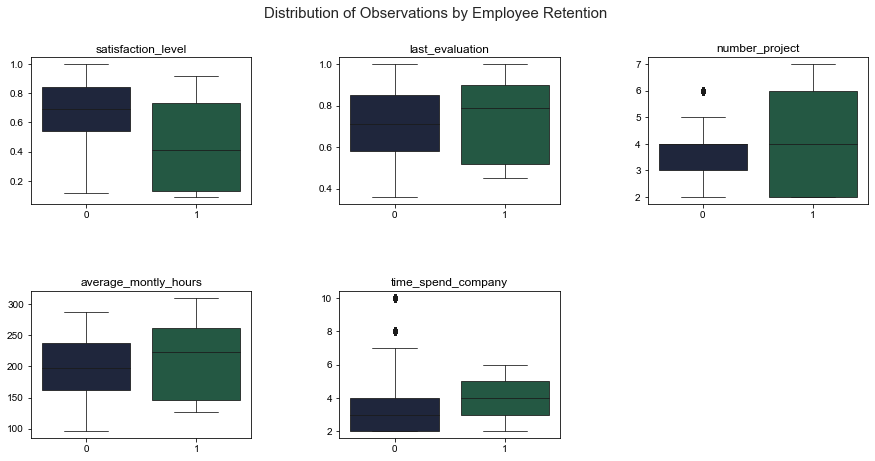

In [6]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

fig, axes = plt.subplots(2, 3, figsize= (15, 7))
sns.set_style('darkgrid')
sns.set_palette('cubehelix')
y= 0
for column in cols:
    i, j = divmod(y, 3)
    sns.boxplot(ax= axes[i, j], x= 'left', y= column, data= hr, linewidth= .8)\
    .set(xlabel= None, ylabel= None, title= column)
    y= y + 1
    
plt.suptitle('Distribution of Observations by Employee Retention', size = 15)
fig.delaxes(axes[1,2])
plt.subplots_adjust(hspace= .6, wspace= .4)
plt.show()

### Salary Impact on Employee Retention

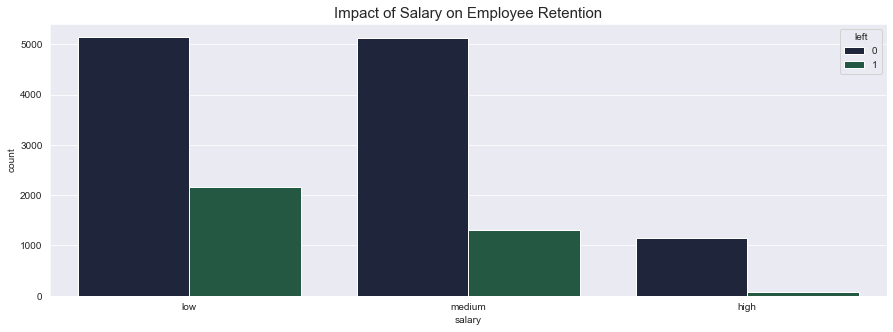

In [7]:
# Visualizing employees by salary and retention
plt.figure(figsize= (15, 5))
sns.countplot(x= 'salary',  hue= 'left', data= hr)
plt.title('Impact of Salary on Employee Retention', size= 15)
plt.show()

### Employee Retention by Department

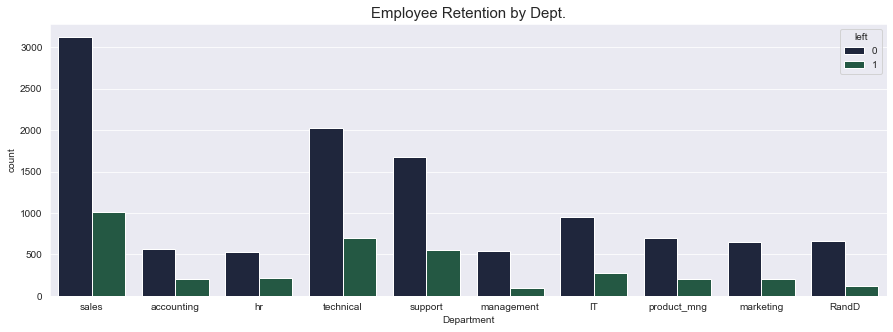

In [8]:
# Visualizing employees by Department and retention
plt.figure(figsize= (15, 5))
sns.countplot(x= 'Department',  hue= 'left', data= hr)
plt.title('Employee Retention by Dept.', size= 15)
plt.show()

### Analysing Categorical Data

#### Promotion

In [9]:
pd.crosstab(hr['promotion_last_5years'], hr['left'])

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


Only 2.13% Employees were promoted over the course of five years

#### Work Accidents

In [10]:
pd.crosstab(hr['Work_accident'], hr['left'])

left,0,1
Work_accident,,
0,9428,3402
1,2000,169


92.21% of employees remained on staff after suffering work accidents makingit an unlikely cause of employee departure

## EDA Findings
**I.** Employees who were retained had more higher job sastifaction levels therefore they enjoy their jobs, same could not be said for those who left as seen from their lower sastification levels.

**II.** From the number of projects assigned to employees, larger workloads were more common in employees that left the company. These could be linked to the longer hours they worked as it was observed that they tended to put in more hours compared to those retained.

**III.** The differences in evaluation scores between retained and non-retained employees were minimal and hence inconsequential in affecting an employee decision to quit.

**IV.** 92.21% of employees remained on staff after suffering work accidents making it an unlikely cause of employee departure.

**V.** It was earlier speculated that employees might have left or remained because of promotions in the last five years, this was unfounded as only a mere 2.13% of all employees were promoted.

**VI.** Across the three Salary categories, a significant number of retained employees earned more than the non-retained employees making it a definite deciding factor when it comes to employee retention.

# Modelling

#### From the EDA carried out on the data, the following conclusions were reached;


- The independent variables are satisfaction_level, projects, average_monthly_hours and salary
- The Dependent variable is left.

In [11]:
# Encoding the salary column
salary_new= {'low':0, 'medium':1, 'high': 2}
hr.salary = hr.salary.map(salary_new)

In [12]:
# Features
columns = ['satisfaction_level', 'number_project','average_montly_hours', 'salary']
x= hr[columns]
x.head()

,satisfaction_level,number_project,average_montly_hours,salary
0,0.38,2,157,0
1,0.80,5,262,1
2,0.11,7,272,1
3,0.72,5,223,0
4,0.37,2,159,0


In [13]:
# Label
y= hr.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [14]:
# Splitting into training and testing cases
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)

print('Training Cases:', len(X_train))
print('Test Cases:', len(y_test))

Training Cases: 10499
Test Cases: 4500


In [15]:
# Fitting into a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
# Testing the model
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

## Model's Accuracy

In [17]:
dt.score(X_train, y_train)

0.9955233831793504

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3462
           1       0.85      0.91      0.88      1038

    accuracy                           0.94      4500
   macro avg       0.91      0.93      0.92      4500
weighted avg       0.94      0.94      0.94      4500



In [19]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[3299,  163],
       [  96,  942]], dtype=int64)

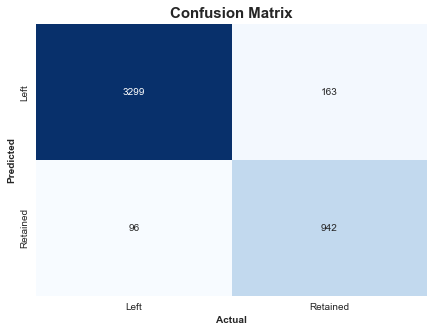

In [20]:
# Visualizing the confusion matrix
classes= ['Left', 'Retained']

plt.figure(figsize= (7,5))
sns.heatmap(cm, annot= True, cmap = 'Blues', fmt = 'g', cbar= False, xticklabels= classes, yticklabels= classes)
plt.xlabel('Actual', fontweight= 'bold')
plt.ylabel('Predicted', fontweight= 'bold')
plt.title('Confusion Matrix', fontweight= 'bold', size = 15)
plt.show()